In [1]:
# Importing libraries
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
# Rescaling training and test data and setting the training and test data
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_data = train.flow_from_directory('C:/Users/joelm/OneDrive/Data Visualization/DSC680/DSC680_Project_2/forest_fire/Training and Validation/',
                                      target_size=(150, 150),
                                      batch_size=32,
                                      class_mode='binary')

test_data = test.flow_from_directory('C:/Users/joelm/OneDrive/Data Visualization/DSC680/DSC680_Project_2/forest_fire/Testing/',
                                      target_size=(150, 150),
                                      batch_size=32,
                                      class_mode='binary')

Found 1833 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [3]:
# Confirming the class types are indexed correctly
test_data.class_indices

{'fire': 0, 'nofire': 1}

In [4]:
# Building the model using CNN
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [5]:
# Compiling the model and setting accuracy metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

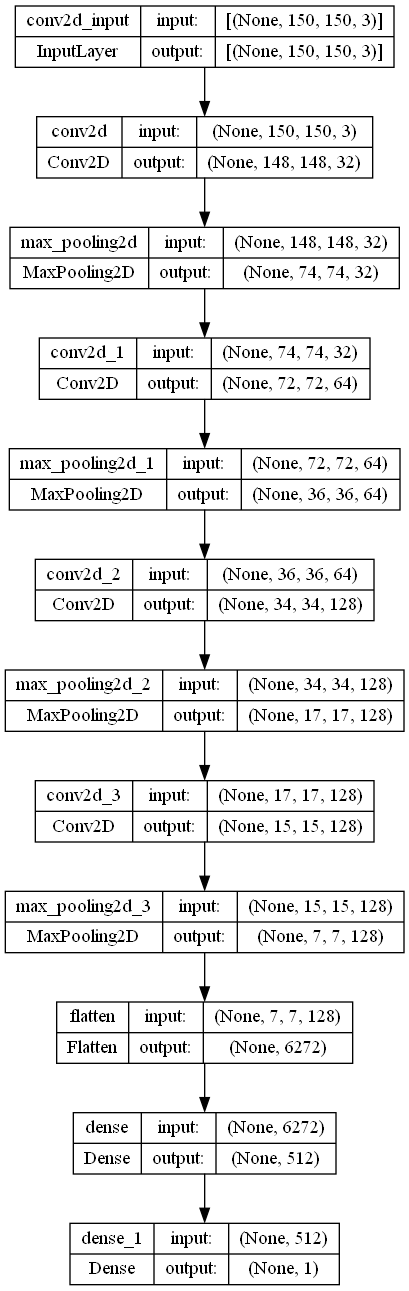

In [6]:
# Visualizing the model with keras plot_model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

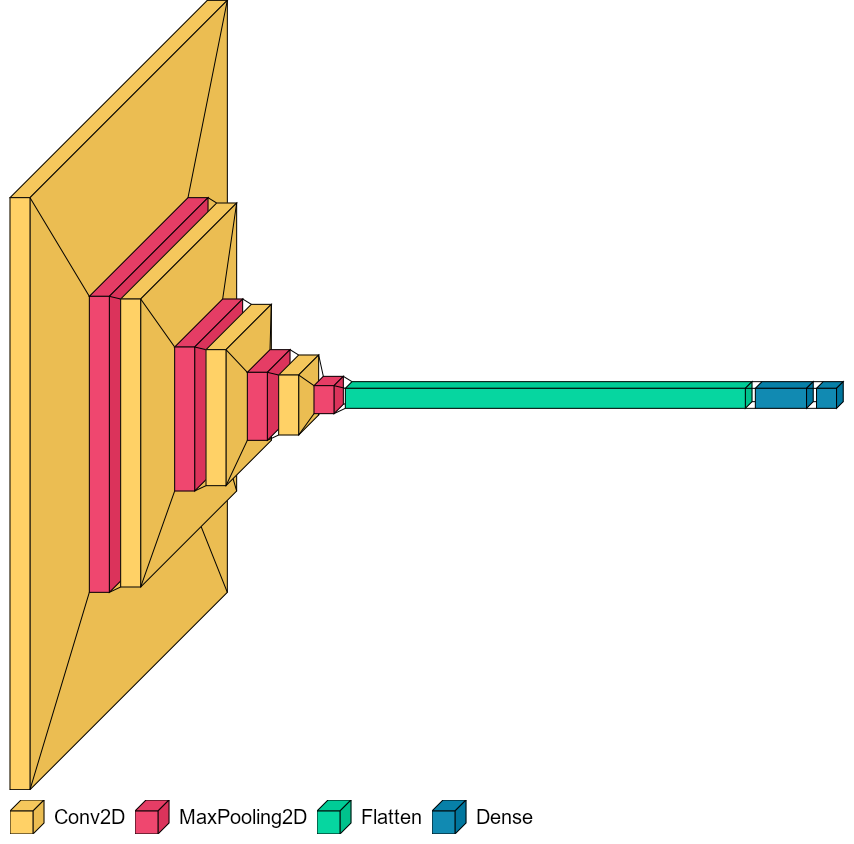

In [17]:
# Visualizing the CNN layers, with legend, using visualkeras
import visualkeras

visualkeras.layered_view(model, legend=True) 
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 20)
visualkeras.layered_view(model, legend=True, font=font)

In [6]:
# Model fit with 5 epochs
#r = model.fit(train_data, epochs=5, validation_data=test_data)

#96.24% accuracy w/ 5 epochs

Epoch 1/5
58/58 [==============================] - 21s 355ms/step - loss: 0.3068 - accuracy: 0.8767 - val_loss: 0.3030 - val_accuracy: 0.8676
Epoch 2/5
58/58 [==============================] - 20s 348ms/step - loss: 0.1539 - accuracy: 0.9525 - val_loss: 0.2359 - val_accuracy: 0.9265
Epoch 3/5
58/58 [==============================] - 20s 348ms/step - loss: 0.1327 - accuracy: 0.9613 - val_loss: 0.2760 - val_accuracy: 0.9118
Epoch 4/5
58/58 [==============================] - 20s 349ms/step - loss: 0.1476 - accuracy: 0.9531 - val_loss: 0.2650 - val_accuracy: 0.9118
Epoch 5/5
58/58 [==============================] - 20s 350ms/step - loss: 0.1158 - accuracy: 0.9624 - val_loss: 0.1835 - val_accuracy: 0.9265


In [18]:
# Model fit with 10 epochs
r = model.fit(train_data, epochs=10, validation_data=test_data)

# 98% accuracy w/o having added in image of cig smoke
# 99.13% accuracy w/ 10 epochs; 

'''
Below shows accuracy at 97.27-98.15% gives two of the highest value accuracy scores (97% and 95.6%)
Epoch 6/10
58/58 [==============================] - 20s 342ms/step - loss: 0.0886 - accuracy: 0.9727 - val_loss: 0.1042 - val_accuracy: 0.9706
Epoch 9/10
58/58 [==============================] - 22s 380ms/step - loss: 0.0607 - accuracy: 0.9815 - val_loss: 0.1741 - val_accuracy: 0.9559
'''

Epoch 1/10
58/58 [==============================] - 19s 323ms/step - loss: 0.2681 - accuracy: 0.9018 - val_loss: 0.4218 - val_accuracy: 0.8529
Epoch 2/10
58/58 [==============================] - 20s 343ms/step - loss: 0.1498 - accuracy: 0.9514 - val_loss: 0.3522 - val_accuracy: 0.8529
Epoch 3/10
58/58 [==============================] - 20s 342ms/step - loss: 0.1315 - accuracy: 0.9580 - val_loss: 0.2966 - val_accuracy: 0.8676
Epoch 4/10
58/58 [==============================] - 21s 355ms/step - loss: 0.1201 - accuracy: 0.9634 - val_loss: 0.3023 - val_accuracy: 0.8824
Epoch 5/10
58/58 [==============================] - 20s 352ms/step - loss: 0.1073 - accuracy: 0.9645 - val_loss: 0.2584 - val_accuracy: 0.8676
Epoch 6/10
58/58 [==============================] - 20s 342ms/step - loss: 0.0886 - accuracy: 0.9727 - val_loss: 0.1042 - val_accuracy: 0.9706
Epoch 7/10
58/58 [==============================] - 21s 370ms/step - loss: 0.0702 - accuracy: 0.9760 - val_loss: 0.2065 - val_accuracy: 0.9265

'\nBelow shows accuracy at 97.98-98.47% gives two of the highest value accuracy scores (97% and 95.6%)\nEpoch 7/10\n58/58 [==============================] - 21s 365ms/step - loss: 0.0679 - accuracy: 0.9798 - val_loss: 0.1194 - val_accuracy: 0.9706\nEpoch 8/10\n58/58 [==============================] - 22s 374ms/step - loss: 0.0471 - accuracy: 0.9847 - val_loss: 0.1805 - val_accuracy: 0.9559\n'

In [19]:
# Making predictions using our model
pred = model.predict(test_data)
pred = np.round(pred)

3/3 [==============================] - 0s 44ms/step


In [20]:
pred

array([[1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [23]:
print(len(pred))

68


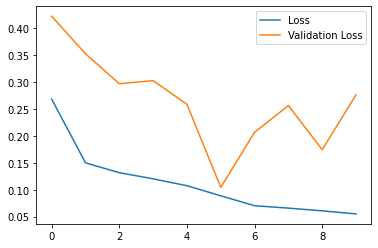

In [22]:
# Plotting the loss and validation loss
# The Loss shows improvement across epochs with how the model fits training data
# The Validation Loss shows improvement across epochs until the last epoch, where
# the model does considerably worse in predicting using new data
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()

In [24]:
# Defining a function for predicting new images
def predictImage(filename):
    img1 = image.load_img(filename, target_size=(150, 150))
    plt.imshow(img1)
    y = image.img_to_array(img1)
    x = np.expand_dims(y, axis=0)
    val = model.predict(x)
    print(val)
    if val == 1:
        plt.xlabel("No Fire Detected", fontsize=25)
    elif val == 0:
        plt.xlabel("Fire Detected", fontsize=25)

1/1 [==============================] - 0s 78ms/step
[[1.]]


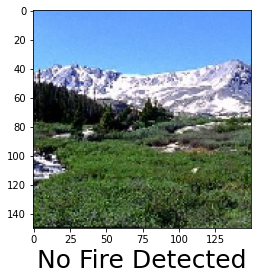

In [25]:
# 1
predictImage('C:/Users/joelm/OneDrive/Data Visualization/DSC680/DSC680_Project_2/forest_fire/Testing/nofire/abc337.jpg')

1/1 [==============================] - 0s 21ms/step
[[0.]]


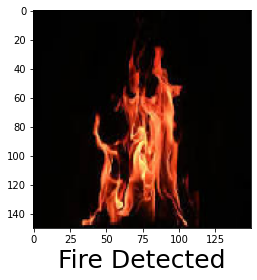

In [26]:
# 2
predictImage('C:/Users/joelm/OneDrive/Data Visualization/DSC680/DSC680_Project_2/forest_fire/Download.jpg')

1/1 [==============================] - 0s 20ms/step
[[1.]]


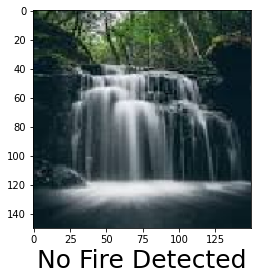

In [27]:
# 3
predictImage('C:/Users/joelm/OneDrive/Data Visualization/DSC680/DSC680_Project_2/forest_fire/dl2.jpg')

1/1 [==============================] - 0s 20ms/step
[[1.]]


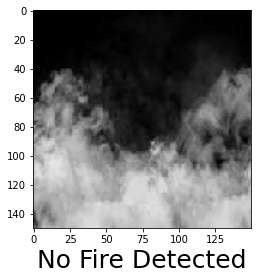

In [28]:
# 4
predictImage('C:/Users/joelm/OneDrive/Data Visualization/DSC680/DSC680_Project_2/forest_fire/dl3.jpg')

1/1 [==============================] - 0s 20ms/step
[[0.]]


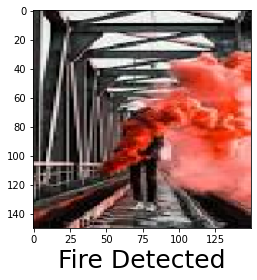

In [29]:
# 5
predictImage('C:/Users/joelm/OneDrive/Data Visualization/DSC680/DSC680_Project_2/forest_fire/dl4.jpg')

1/1 [==============================] - 0s 20ms/step
[[0.]]


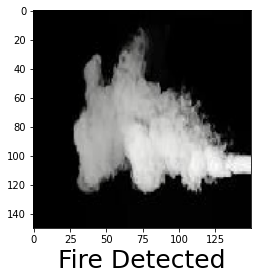

In [30]:
# 6
predictImage('C:/Users/joelm/OneDrive/Data Visualization/DSC680/DSC680_Project_2/forest_fire/dl5.jpg')

1/1 [==============================] - 0s 21ms/step
[[1.]]


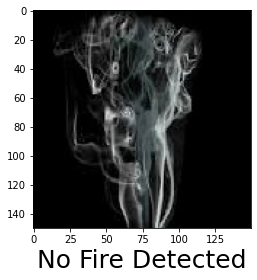

In [32]:
# 8
# The following image is perplexing, as it and image #4 come up as both Fire Detected and No Fire Detected
# across multiple instantiations of this model. This is an area of opportunity for modeling accuracy as 
# part of the goal of this project is early fire detection

predictImage('C:/Users/joelm/OneDrive/Data Visualization/DSC680/DSC680_Project_2/forest_fire/dl6.jpg')